The Copernicus digital elevation model is derived from the WorldDEMTM digital surface model based on the radar satellite data acquired during the TanDEM-X Mission. The Planetary Computer hosts these data as Cloud Optimized GeoTIFFs in two resolutions, 90m and 30m.

For this example, we will find the DEM tile that includes the Grand Canyon and plot the elevation data with some hillshade.

In [1]:
import pandas as pd

In [2]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

Perform a STAC API query against the finer resolution cop-dem-glo-30 collection for our point of interest.

In [3]:
grand_canyon = [-112.15, 36.05]
search = catalog.search(
    collections=["cop-dem-glo-30"],
    intersects={"type": "Point", "coordinates": grand_canyon},
)
items = list(search.get_items())
print(f"Returned {len(items)} items")

Returned 1 items


In [4]:
list(items[0].assets)

['data', 'tilejson', 'rendered_preview']

In [5]:
items[0].assets

{'data': <Asset href=https://elevationeuwest.blob.core.windows.net/copernicus-dem/COP30_hh/Copernicus_DSM_COG_10_N36_00_W113_00_DEM.tif?st=2023-02-01T08%3A59%3A52Z&se=2023-02-02T09%3A44%3A52Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-02-02T06%3A33%3A29Z&ske=2023-02-09T06%3A33%3A29Z&sks=b&skv=2021-06-08&sig=RczD%2BStV3E2ugH8brZz/lEBP29gPUScc6UYEA0iSr6U%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=cop-dem-glo-30&item=Copernicus_DSM_COG_10_N36_00_W113_00_DEM&assets=data&colormap_name=terrain&rescale=-1000%2C4000&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=cop-dem-glo-30&item=Copernicus_DSM_COG_10_N36_00_W113_00_DEM&assets=data&colormap_name=terrain&rescale=-1000%2C4000&format=png>}

In [6]:
# Get the first item
item = items[0]

In [7]:
import planetary_computer
import rioxarray

signed_asset = planetary_computer.sign(items[0].assets["data"])
data = (
    rioxarray.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")
    .coarsen({"y": 5, "x": 5})
    .mean()
)

With the data loaded, we can use xarray-spatial to generate a shaded relief.

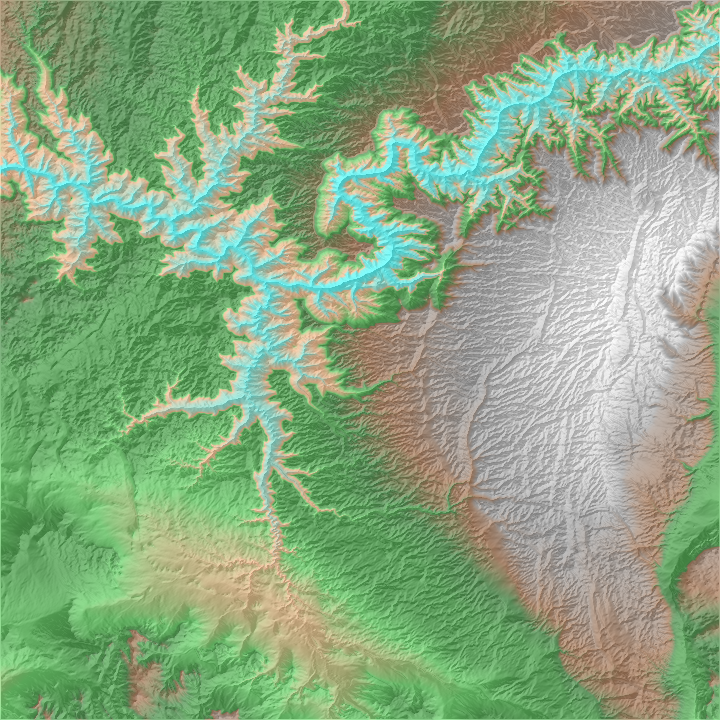

In [8]:
import xrspatial
from datashader.transfer_functions import shade, stack
from datashader.colors import Elevation

hillshade = xrspatial.hillshade(data)
stack(shade(hillshade, cmap=["white", "gray"]), shade(data, cmap=Elevation, alpha=128))

trying to get the elevation data for another coordinates

In [9]:
# giving another coordinates
manhatan=(-74.01696738719507, 40.70225089772798)
search = catalog.search(
    collections=["cop-dem-glo-30"],
    intersects={"type": "Point", "coordinates": manhatan},
)
items = list(search.get_items())
print(f"Returned {len(items)} items")

Returned 1 items


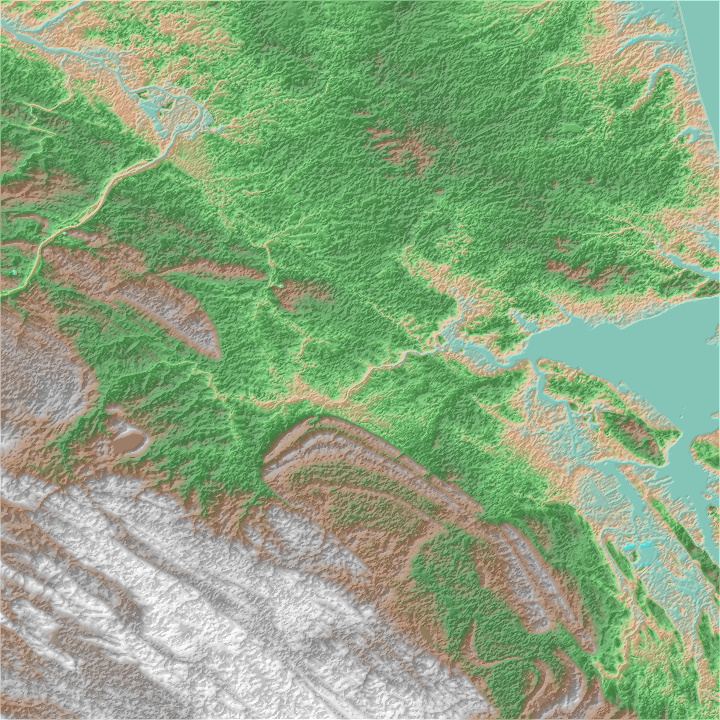

In [10]:
signed_asset = planetary_computer.sign(items[0].assets["data"])
data = (
    rioxarray.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")
    .coarsen({"y": 5, "x": 5})
    .mean()
)


hillshade = xrspatial.hillshade(data)
stack(shade(hillshade, cmap=["white", "gray"]), shade(data, cmap=Elevation, alpha=128))


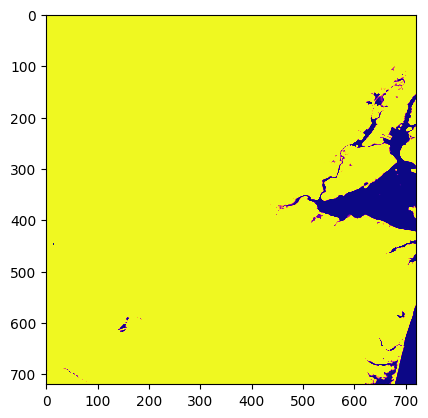

In [16]:
import matplotlib.pyplot as plt
#plt.imshow(data, cmap='pink')
plt.imshow(data,cmap='plasma', vmin=0, vmax=1)
plt.show()